<a href="https://colab.research.google.com/github/JamisonHunter/Adult-Income-Prediction/blob/main/adult_income_prediction_j_hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

# Load & Inspect Data

In [4]:
path1 = "/content/drive/MyDrive/adult.csv"
df = pd.read_csv(path1)
df2 = df.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning

In [5]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 48842 rows and 15 columns.


The columns "education" and "educational-num" both give us the same information but in different ways. Due to this, I will delete the "education" column.

In [6]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [7]:
df["educational-num"].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

This confirms that the columns do in fact represent the same information.

In [8]:
# removing the education column
df = df.drop(columns = ["education"])

In [9]:
# checking to see if the column was removed
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [11]:
# dropping duplicate rows
df = df.drop_duplicates()

In [12]:
# checking if duplicate rows have been removed
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [13]:
# checking for missing values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no missing values in this data set.

In [14]:
# looking to see what columns may have inconsistencies
df.describe(include = "object")

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,7,15,6,5,2,42,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,22366,6165,19703,41714,32614,43792,37109


In [15]:
df["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [18]:
df["relationship"].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
df["race"].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
df["native-country"].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

I found no inconsistent data.

In [21]:
# looking to see which numerical columns may have inconsistencies
df.describe(include = "number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Age Distribution')

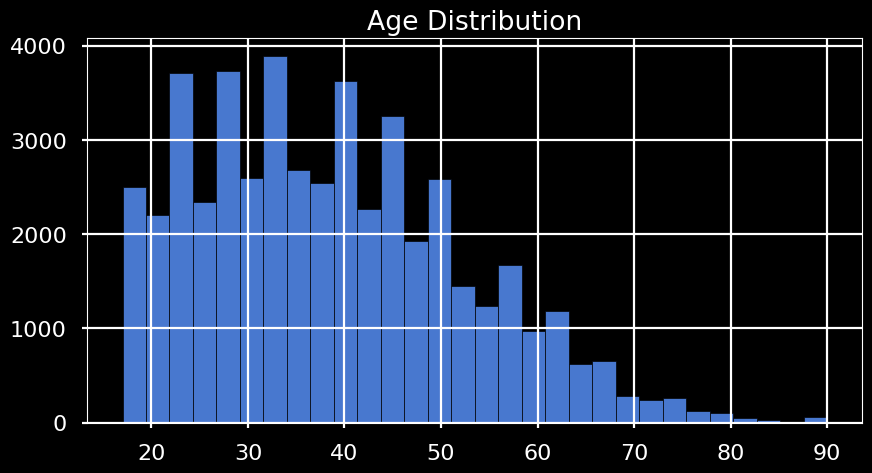

In [22]:
# checking age column distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["age"].hist(bins = 30, edgecolor = "black")
ax.set_title("Age Distribution")

Text(0.5, 1.0, 'Final Weight Distribution')

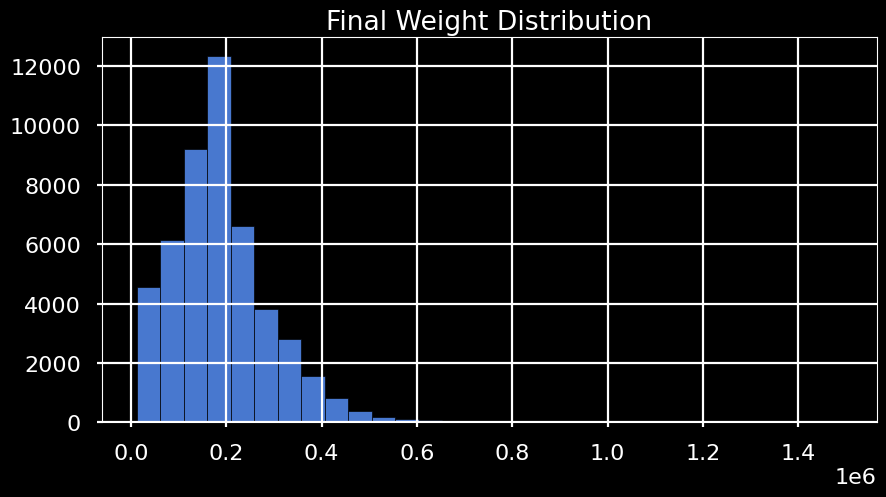

In [23]:
# checking fnlwgt distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["fnlwgt"].hist(bins = 30, edgecolor = "black")
ax.set_title("Final Weight Distribution")

Text(0.5, 1.0, 'Education Level Distribution')

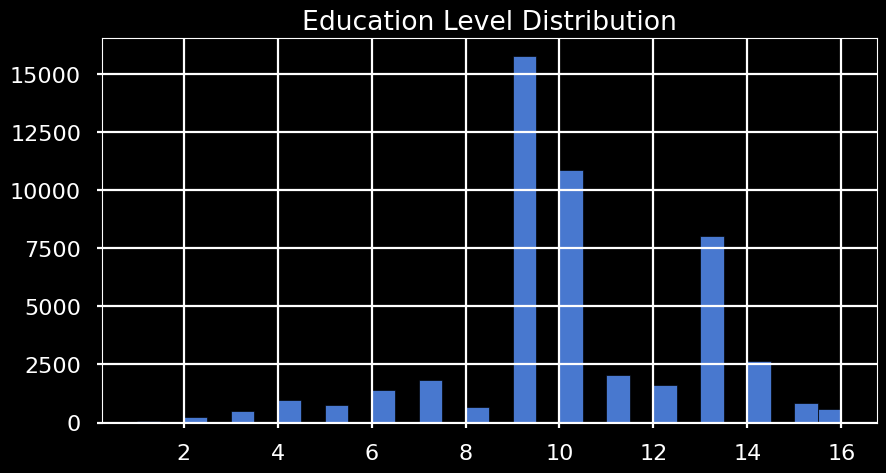

In [24]:
# checking education level distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["educational-num"].hist(bins = 30, edgecolor = "black")
ax.set_title("Education Level Distribution")

Text(0.5, 1.0, 'Capital Gains Distribution')

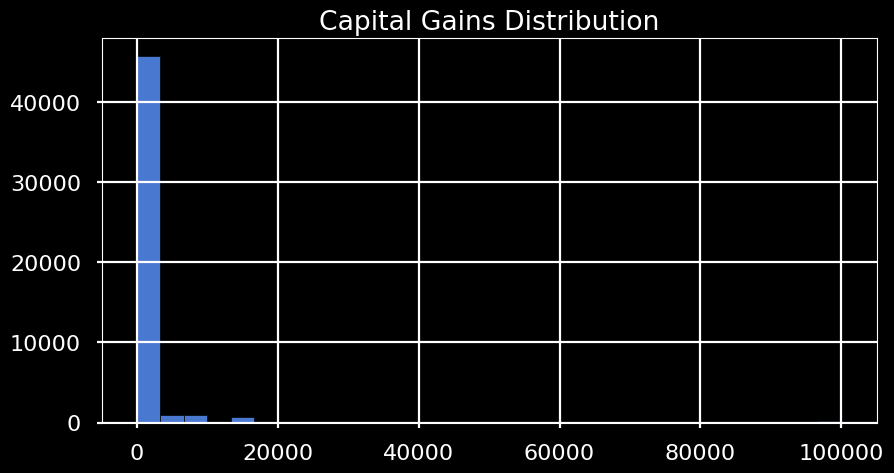

In [25]:
# checking capital-gain distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["capital-gain"].hist(bins = 30, edgecolor = "black")
ax.set_title("Capital Gains Distribution")

Text(0.5, 1.0, 'Capital Loss Distribution')

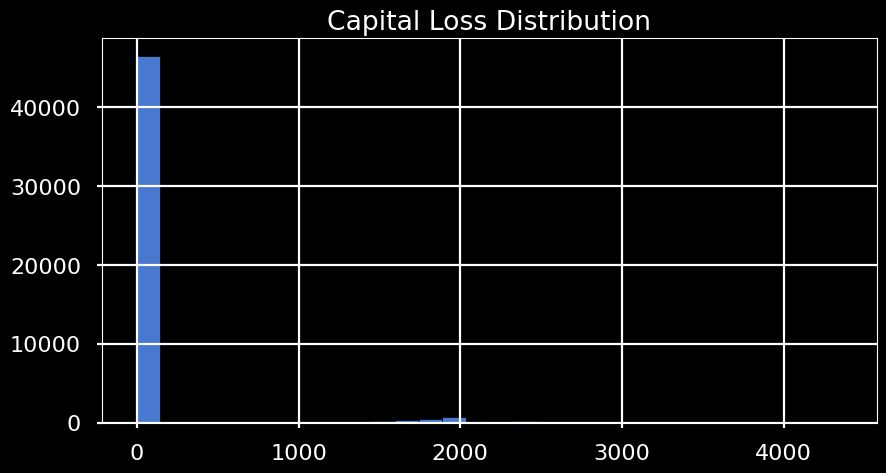

In [26]:
# checking capital-loss distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["capital-loss"].hist(bins = 30, edgecolor = "black")
ax.set_title("Capital Loss Distribution")

Text(0.5, 1.0, 'Hours Per Week Distribution')

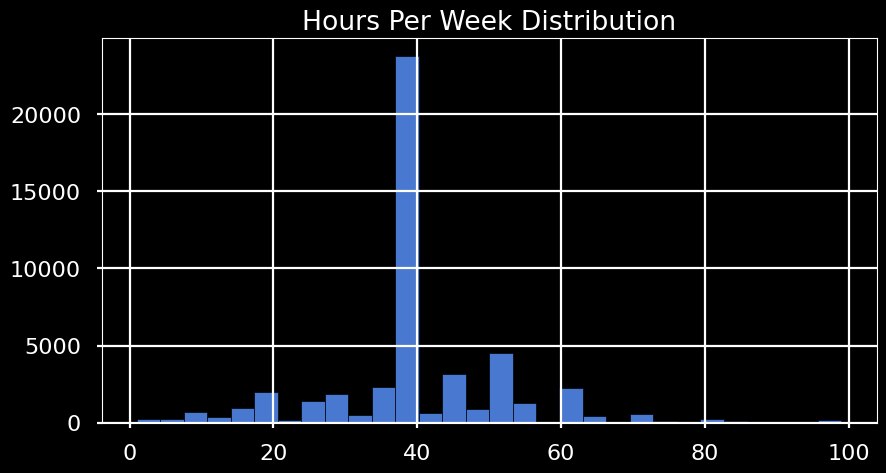

In [27]:
# checking hours-per-week distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["hours-per-week"].hist(bins = 30, edgecolor = "black")
ax.set_title("Hours Per Week Distribution")

All of the numerical columns look sensible upon first glance.

Since the target data set will be income, I will generate a bar graph of this column data.

Text(0.5, 1.0, 'Income')

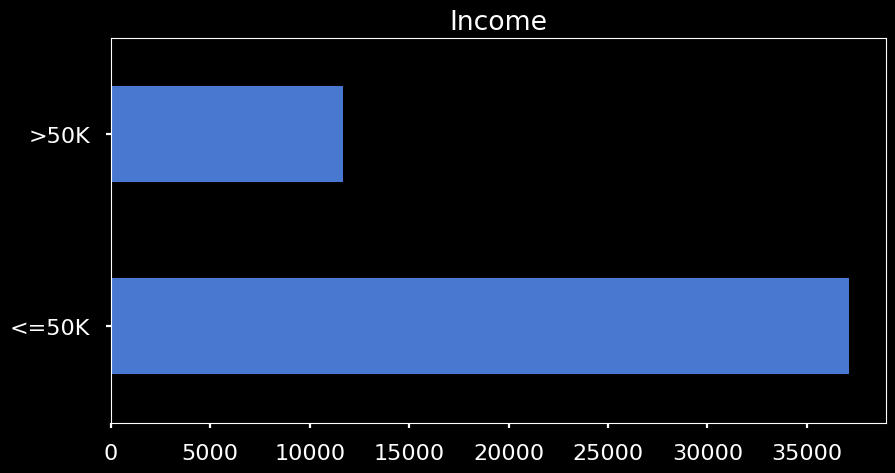

In [28]:
# generating a bar graph of income
fig, ax = plt.subplots(figsize=(10,5))
ax = df["income"].value_counts().plot(kind = "barh")
ax.set_title("Income")

We can immediately see that a minority of the income earnings are greater than $50,000 per year.

# Exploratory Data Analysis

For any exploratory data analysis, it is a good idea to first get a sense of any correlations within the data. I will create a heatmap in order to better visualize the correlations.

In [29]:
# checking for correlations numerically
corr = df.corr()
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521
educational-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000


Text(0.5, 1.0, 'Adult Income Correlations')

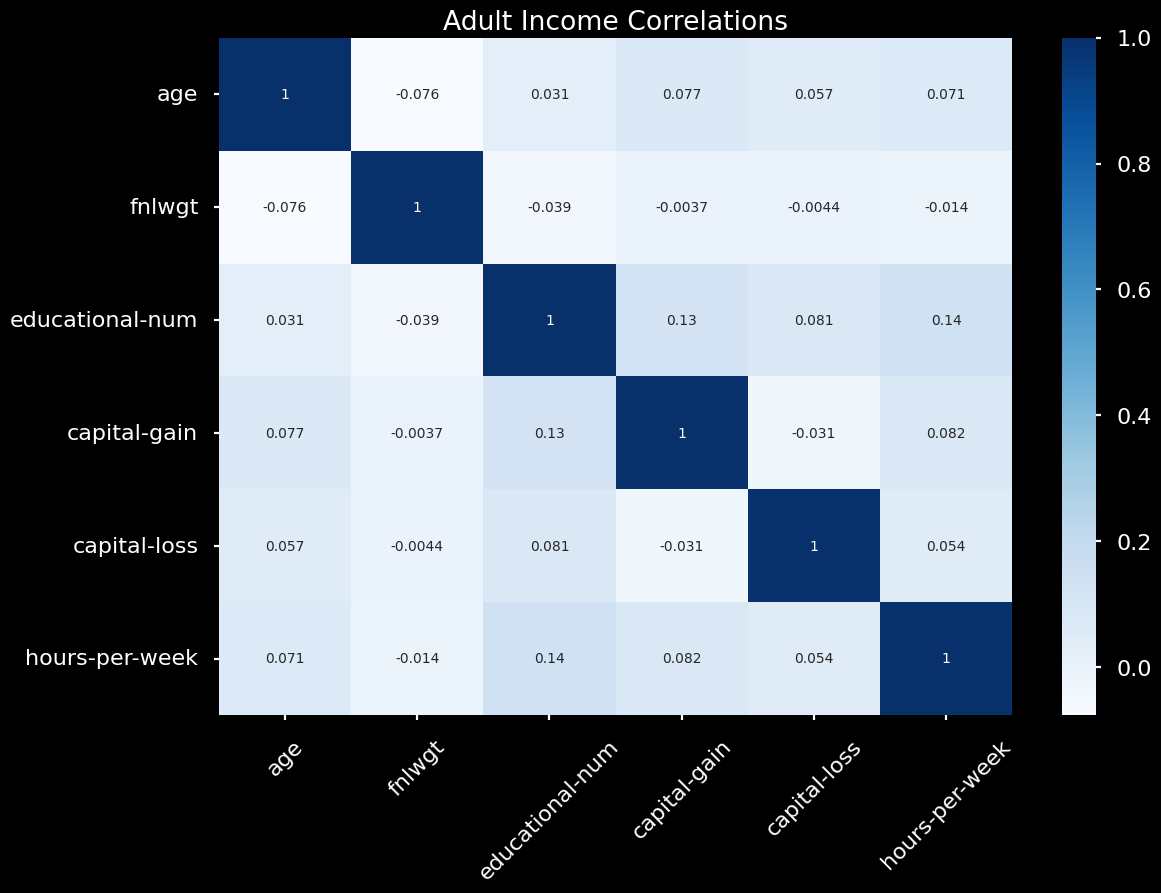

In [30]:
# generating a heatmap of correlations
ax = sns.heatmap(corr, cmap = "Blues", annot = True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title("Adult Income Correlations")

Overall, the features of this data set seem to have rather low correlations to one another; though, there are a couple of standouts with higher correlations. Education and hours per week worked has a correlation of 0.14 along with capital gain and education, which has a correlation of 0.13. I will create visualizations of these in order to get a more in depth look at the correlations.

Text(0.5, 1.0, 'Capital Gains')

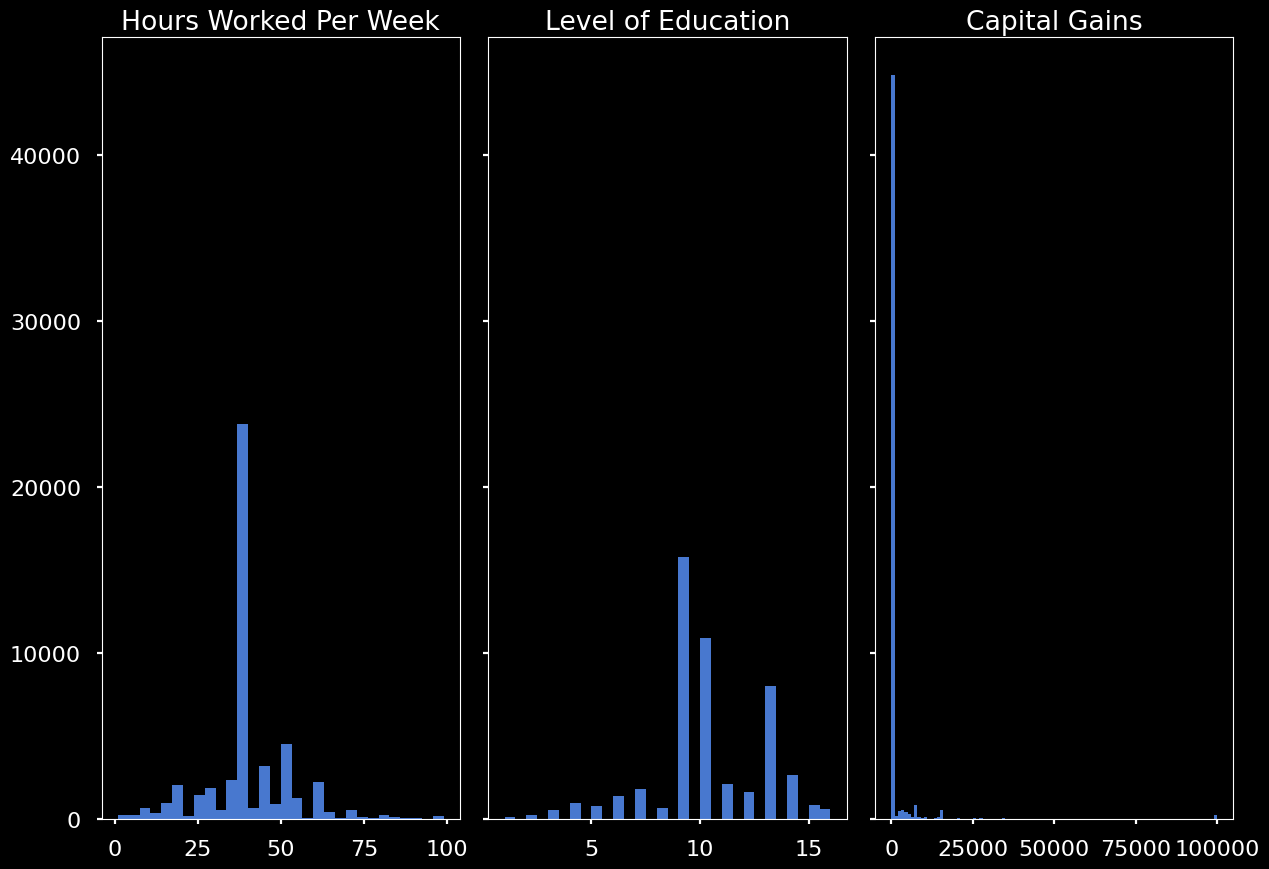

In [31]:
# generating histograms of the highest correlating values
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(df["hours-per-week"], bins = 30)
axs[1].hist(df["educational-num"], bins = 30)
axs[2].hist(df["capital-gain"], bins = 100)

axs[0].set_title("Hours Worked Per Week")
axs[1].set_title("Level of Education")
axs[2].set_title("Capital Gains")

In the three above histograms, we can see a few key spikes, which represents the most common trends. Hours worked per week hovers around forty, which seems quite typical. In terms of education, the majority hovers around ten, which is representative of having some college education. The most common value for capital gains is zero.

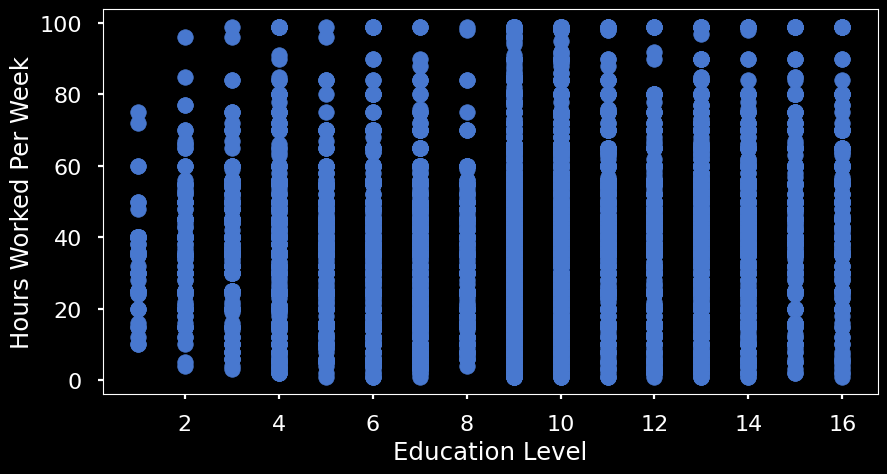

In [32]:
hours = df["hours-per-week"].values
capital = df["capital-gain"].values
education = df["educational-num"].values

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(education, hours);
ax.set(xlabel='Education Level', ylabel='Hours Worked Per Week');

A level nine education, just below some college seems to have the highest hours worked per week generally.

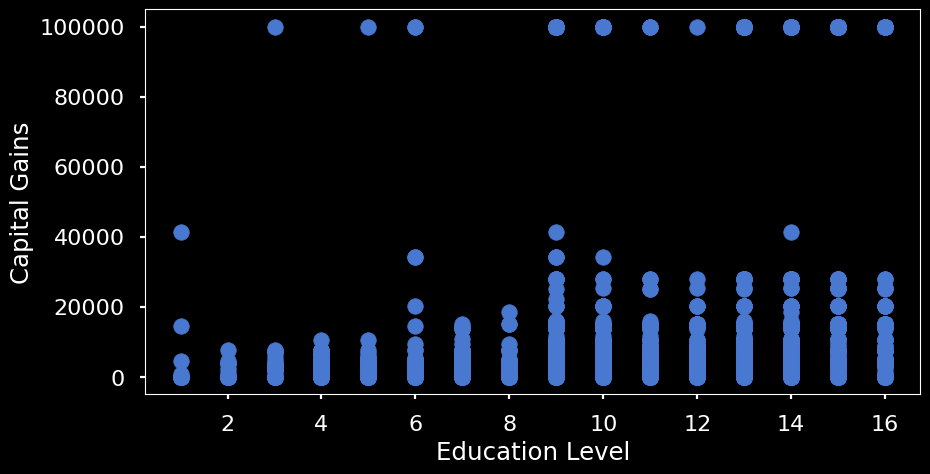

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(education, capital);
ax.set(xlabel='Education Level', ylabel='Capital Gains');

# Feature Engineering

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   educational-num  48790 non-null  int64 
 4   marital-status   48790 non-null  object
 5   occupation       48790 non-null  object
 6   relationship     48790 non-null  object
 7   race             48790 non-null  object
 8   gender           48790 non-null  object
 9   capital-gain     48790 non-null  int64 
 10  capital-loss     48790 non-null  int64 
 11  hours-per-week   48790 non-null  int64 
 12  native-country   48790 non-null  object
 13  income           48790 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


So far, I see multiple areas in which we could acquire more meaningful predictions by reducing the amount of unique catagorical values in certain columns.

In [35]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [36]:
df["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [37]:
df["workclass"].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

The marital status column could easily be reduced to two statuses; married and unmarried in order to reduce the number of unique but meaningful features. Work class could also be reduced down to government work, private work, and unemployed statuses.

In [38]:
df = df.replace(to_replace = "Never-married", value = "Unmarried")
df = df.replace(to_replace = "Married-civ-spouse", value = "Married")
df = df.replace(to_replace = "Widowed", value = "Unmarried")
df = df.replace(to_replace = "Divorced", value = "Unmarried")
df = df.replace(to_replace = "Separated", value = "Married")
df = df.replace(to_replace = "Married-spouse-absent", value = "Married")
df = df.replace(to_replace = "Married-AF-spouse", value = "Married")
df["marital-status"].unique()

array(['Unmarried', 'Married'], dtype=object)

In [39]:
df = df.replace(to_replace = "Local-gov", value = "Government")
df = df.replace(to_replace = "Federal-gov", value = "Government")
df = df.replace(to_replace = "State-gov", value = "Government")
df = df.replace(to_replace = "Self-emp-not-inc", value = "Private")
df = df.replace(to_replace = "Self-emp-inc", value = "Private")
df = df.replace(to_replace = "Never-worked", value = "Unemployed")
df = df.replace(to_replace = "Without-pay", value = "Unknown")
df = df.replace(to_replace = "?", value = "Unknown")
df["workclass"].unique()

array(['Private', 'Government', 'Unknown', 'Unemployed'], dtype=object)

# Preprocessing Data

In [40]:
X = df.drop(columns = ["income"])
y = df["income"]

In [41]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,7,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Government,336951,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Unknown,103497,10,Unmarried,Unknown,Own-child,White,Female,0,0,30,United-States


In [42]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [43]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
# Instantiate Standard Scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff4dd669960>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff4dd668760>)])

In [72]:
# Instantiate & fit data using PCA
pca = PCA(n_components=.95)
pca_processor = make_pipeline(preprocessor, pca)

In [45]:
# creating a preprocessed feature data frame
preprocessed_df = preprocessor.fit(X)

# Predictive Algorithms

# KNN Model

In [46]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn_pipe = make_pipeline(preprocessed_df, knn)

knn_pipe.fit(X_train, y_train)
knn_pipe.predict(X_test)

knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)
print(f"Train score: {knn_train_score}")
print(f"Test score: {knn_test_score}")

Train score: 0.99989068648885
Test score: 0.7994753238235777


In [47]:
knn_preds = knn_pipe.predict(X_test)
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      9288
        >50K       0.58      0.58      0.58      2910

    accuracy                           0.80     12198
   macro avg       0.72      0.73      0.72     12198
weighted avg       0.80      0.80      0.80     12198



In [71]:
unique, counts = np.unique(knn_preds, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 9288]
 ['>50K' 2910]]


This first predictive model was accurate within roughly 20%. I will attempt to obtain more accurate results with a combination of PCA and hyperparameter tuning.

In [48]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [60]:
# parameter grid
knn_param_grid = {"n_neighbors" : [1, 2, 3, 4, 5, 7, 11, 13, 15],
                  "leaf_size" : [20, 30, 40, 50, 60],
                  'weights' : ['uniform','distance'],
                  'metric' : ['minkowski','euclidean']}

In [61]:
base_estimator = KNeighborsClassifier()
X, y = make_classification(n_samples=1000)
sh = HalvingGridSearchCV(base_estimator, knn_param_grid, cv=5,
                         factor=2).fit(X, y)
sh.best_estimator_

KNeighborsClassifier(leaf_size=50, n_neighbors=7, weights='distance')

In [63]:
knn_tuned = KNeighborsClassifier(n_neighbors = 7,
                                 leaf_size = 50,
                                 metric = "euclidean",
                                 weights = "distance")
knn_pipe_tuned = make_pipeline(pca_processor, knn_tuned)

knn_pipe_tuned.fit(X_train, y_train)
knn_pipe_tuned.predict(X_test)

knn_train_score_tuned = knn_pipe_tuned.score(X_train, y_train)
knn_test_score_tuned = knn_pipe_tuned.score(X_test, y_test)
print(f"Train score: {knn_train_score_tuned}")
print(f"Test score: {knn_test_score_tuned}")

Train score: 0.99989068648885
Test score: 0.8325135268076734


In [64]:
knn_preds_tuned = knn_pipe_tuned.predict(X_test)
print(classification_report(knn_preds_tuned, y_test))

              precision    recall  f1-score   support

       <=50K       0.91      0.87      0.89      9711
        >50K       0.58      0.68      0.62      2487

    accuracy                           0.83     12198
   macro avg       0.74      0.78      0.76     12198
weighted avg       0.84      0.83      0.84     12198



In [70]:
unique, counts = np.unique(knn_preds_tuned, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 9711]
 ['>50K' 2487]]


The hyperparameter tuning increased the model's accuracy by roughly 3%.

# Random Forest Model

In [53]:
# creating and testing a random forest model
rf = RandomForestClassifier(random_state = 42)
# creating a pipeline using the scaler and preprocessor
rf_pipe = make_pipeline(preprocessed_df, rf)

rf_pipe.fit(X_train, y_train)

rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(f"Train score: {rf_train_score}")
print(f"Test score: {rf_test_score}")

Train score: 0.99989068648885
Test score: 0.8553041482210199


In [54]:
rf_preds = rf_pipe.predict(X_test)
print(classification_report(rf_preds, y_test))

              precision    recall  f1-score   support

       <=50K       0.93      0.89      0.91      9729
        >50K       0.62      0.74      0.67      2469

    accuracy                           0.86     12198
   macro avg       0.77      0.81      0.79     12198
weighted avg       0.87      0.86      0.86     12198



In [73]:
unique, counts = np.unique(rf_preds, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 9729]
 ['>50K' 2469]]


In [55]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [95]:
# parameter grid
rf_param_grid = {'bootstrap': [True, False],
                 'max_features': ['auto', 'sqrt'],
                 "max_depth" : [10, 80, 100, 110, None],
                 'min_samples_leaf': [1, 2, 4]}

In [96]:
base_estimator = RandomForestClassifier()
X, y = make_classification(n_samples=1000)
sh = HalvingGridSearchCV(base_estimator, rf_param_grid, cv=5,
                         factor=2).fit(X, y)
sh.best_estimator_

RandomForestClassifier(max_depth=100, max_features='auto')

In [103]:
# creating and testing a random forest model
rf_tuned = RandomForestClassifier(random_state = 42,
                                  max_features = "auto",
                                  max_depth = 100,
                                  n_estimators = 1200)
# creating a pipeline using the scaler and preprocessor
rf_pipe_tuned = make_pipeline(pca_processor, rf_tuned)

rf_pipe_tuned.fit(X_train, y_train)

rf_train_score_tuned = rf_pipe_tuned.score(X_train, y_train)
rf_test_score_tuned = rf_pipe_tuned.score(X_test, y_test)
print(f"Train score: {rf_train_score_tuned}")
print(f"Test score: {rf_test_score_tuned}")

Train score: 0.99989068648885
Test score: 0.8418593212001968


In [104]:
rf_preds_tuned = rf_pipe_tuned.predict(X_test)
print(classification_report(rf_preds_tuned, y_test))

              precision    recall  f1-score   support

       <=50K       0.93      0.87      0.90      9807
        >50K       0.58      0.71      0.64      2391

    accuracy                           0.84     12198
   macro avg       0.75      0.79      0.77     12198
weighted avg       0.86      0.84      0.85     12198



In [105]:
unique, counts = np.unique(rf_preds_tuned, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 9807]
 ['>50K' 2391]]


Unfortunately, after attempting multiple hyperparameeter tunings, I was unable to increase the test score for the random forest model. Therefore, the untuned model has better predictive ability overall.

# Gradient Boosting Model

In [56]:
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessed_df, gbc)

gbc_pipe.fit(X_train, y_train)

gbc_train_score = gbc_pipe.score(X_train, y_train)
gbc_test_score = gbc_pipe.score(X_test, y_test)
print(f"Train score: {gbc_train_score}")
print(f"Test score: {gbc_test_score}")

Train score: 0.8686051595977263
Test score: 0.8646499426135432


In [57]:
gbc_preds = gbc_pipe.predict(X_test)
print(classification_report(gbc_preds, y_test))

              precision    recall  f1-score   support

       <=50K       0.95      0.88      0.91     10005
        >50K       0.59      0.79      0.68      2193

    accuracy                           0.86     12198
   macro avg       0.77      0.84      0.80     12198
weighted avg       0.89      0.86      0.87     12198



In [111]:
unique, counts = np.unique(gbc_preds, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 10005]
 ['>50K' 2193]]


In [58]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [107]:
# parameter grid
gbc_param_grid = {"max_depth" : [10, 80, 100, 110, None],
                 'min_samples_leaf': [1, 2, 4]}

In [108]:
base_estimator = GradientBoostingClassifier()
X, y = make_classification(n_samples=1000)
sh = HalvingGridSearchCV(base_estimator, gbc_param_grid, cv=5,
                         factor=2).fit(X, y)
sh.best_estimator_

GradientBoostingClassifier(max_depth=100, min_samples_leaf=4)

In [109]:
# Instantiate and fit gradient boosting classifier
gbc_tuned = GradientBoostingClassifier(max_depth = 100, min_samples_leaf = 4)

gbc_pipe_tuned = make_pipeline(pca_processor, gbc_tuned)

gbc_pipe_tuned.fit(X_train, y_train)

gbc_train_score_tuned = gbc_pipe_tuned.score(X_train, y_train)
gbc_test_score_tuned = gbc_pipe_tuned.score(X_test, y_test)
print(f"Train score: {gbc_train_score_tuned}")
print(f"Test score: {gbc_test_score_tuned}")

Train score: 0.99989068648885
Test score: 0.8374323659616331


In [112]:
gbc_preds_tuned = gbc_pipe_tuned.predict(X_test)
print(classification_report(gbc_preds_tuned, y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.87      0.90      9715
        >50K       0.59      0.69      0.63      2483

    accuracy                           0.84     12198
   macro avg       0.75      0.78      0.76     12198
weighted avg       0.85      0.84      0.84     12198



In [113]:
unique, counts = np.unique(gbc_preds_tuned, return_counts=True)
print(np.asarray((unique, counts)).T)

[['<=50K' 9715]
 ['>50K' 2483]]


The training score was increased by 4% while the test score decreased by roughly 3%, which means that the model is slightly more variant than the original.

# Conclusion

In [114]:
# observing the value counts of the original target in order to compare them to the printed results
df["income"].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [115]:
# looking back at the tuned knn model's classification report
knn_preds_tuned = knn_pipe_tuned.predict(X_test)
print(classification_report(knn_preds_tuned, y_test))

              precision    recall  f1-score   support

       <=50K       0.91      0.87      0.89      9711
        >50K       0.58      0.68      0.62      2487

    accuracy                           0.83     12198
   macro avg       0.74      0.78      0.76     12198
weighted avg       0.84      0.83      0.84     12198



In [116]:
# looking back on the gradient boosting model's classification report
gbc_preds_tuned = gbc_pipe_tuned.predict(X_test)
print(classification_report(gbc_preds_tuned, y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.87      0.90      9715
        >50K       0.59      0.69      0.63      2483

    accuracy                           0.84     12198
   macro avg       0.75      0.78      0.76     12198
weighted avg       0.85      0.84      0.84     12198



After looking at the ratios of each model's target predictions, it is my opinion that the tuned gradient boosting model ought to be deployed. While the tuned KNN model also achieved the same ratio of predicted data and very similar accuracy, the tuned gradient boosting model shows higher precision in the classification report. Both models show accuracy within roughly 17% of the training data. Therefore, I am confident in giving my final recommendation as the tuned gradient boosting model.